# Последовательный критерий отношения правдоподобия

## 0. Подготовка

### 0.1 Импорт нужных библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import math

### 0.2 Импорт выборки

In [2]:
df = pd.read_csv ('lab5_data.csv', sep=';', header=None, decimal=",")
df = df.astype('float')
pd.set_option('display.expand_frame_repr', False)

heading_properties = [('font-size', '18px')]
cell_properties = [('font-size', '14px')]

dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]

df.style.set_table_styles(dfstyle)

print(df)

        0      1       2      3      4      5      6      7      8      9
0 -12.953 -6.924  -3.899 -5.577 -1.907 -7.126 -2.946 -5.936 -8.230 -7.434
1   1.866 -7.803 -11.133 -4.278 -3.778 -7.213 -4.846 -8.924 -2.306 -4.360
2  -1.266  0.274  -4.223 -4.767 -1.447 -2.341  3.133 -3.707 -6.248 -1.714
3  -5.386 -3.212 -11.145 -6.166 -3.878 -1.743 -4.606 -2.666 -4.795 -2.660
4  -3.798 -2.742  -3.989 -7.383 -5.028 -4.380 -2.598 -7.183 -4.557 -3.034
5  -7.432 -7.505  -3.089 -5.018  0.633 -7.363 -1.919 -6.944 -1.967 -7.336
6  -2.767 -6.135  -3.173 -2.852 -7.748 -1.776 -4.381 -5.021  0.088 -4.151
7  -4.699 -1.634  -4.809  1.433 -2.706 -6.897 -1.722 -4.494 -9.873 -3.988


In [3]:
alpha = 0.04
a_0 = -4
sigma_0 = 2
a_1 = -4.5
sigma_1 = 2.7
eps = 0.15
n = 80

## 1. 	Постройте последовательный критерий Вальда для проверки гипотезы $H_0$: a=$-4$  против альтернативы $H_1$:a=-4.5 при известном σ=$2.7$. Ошибка первого рода задана в условии, ошибка второго рода β вычислена вами в пункте 4.

#### Найдем такие границы A и B, которые удовлетворяют следующему условию:

$$B < z(X_1 ... X_n) = \frac{L(X_1 ... X_n, \alpha_1)}{L(X_1 ... X_n, \alpha_0)} < A$$

#### Положим:

$$\nu = min\{n: z(X_1 ... X_n) \not\in (B, A)\}$$

#### То есть статистикой критерия будет $z(\nu, X_1 ... X_n)$.

#### Критерий Вальда: если $z(X_1 ... X_n)\geq$ A, то принимается $H_1$, если $z(X_1 ... X_n) \leq B$, то принимается $H_0$. Тогда ошибка первого рода принимает вид:

In [4]:
md(f'$${alpha} = P(z(X_1 ... X_\\nu) \\geq A | H_0)$$')

$$0.04 = P(z(X_1 ... X_\nu) \geq A | H_0)$$

#### А ошибка второго рода:

In [5]:
beta = 0.53758 # Мы определили в прошлом задании

In [6]:
md(f'$${beta} = P(z(X_1 ... X_\\nu) \\leq B | H_0)$$')

$$0.53758 = P(z(X_1 ... X_\nu) \leq B | H_0)$$

#### Постоянные A и B вычислим по формулам Вальда: 

In [7]:
A = (1 - beta) / alpha
md(f'$$A = \\frac {{1 - \\beta}} {{\\alpha}} = {A}$$')

$$A = \frac {1 - \beta} {\alpha} = 11.560500000000001$$

In [8]:
B = round((beta) / (1 - alpha), 6)
md(f'$$B = \\frac {{\\beta}} {{1 - \\alpha}} = {B}$$')

$$B = \frac {\beta} {1 - \alpha} = 0.559979$$

#### Отношение правдоподобия можно вычислить следующим образом:

$$\frac {L(X_1 ... X_n, \alpha_1, \sigma_1)}{L(X_1 ... X_n, \alpha_0, \sigma_1)} = \prod_1^n \frac{p(X_1 ... X_n, \alpha_1, \sigma_1)}{p(X_1 ... X_n, \alpha_0, \sigma_1)} = exp \left( \sum_{k=1}^n \frac{(X_k - \alpha_0)^2}{2\sigma_1^2} - \sum_{k=1}^n \frac{(X_k - \alpha_1)^2}{2\sigma_1^2}\right) = exp \left(n \frac{\alpha_0^2 - \alpha_1^2}{2\sigma_1^2} + \frac{\alpha_1 - \alpha_0}{\sigma_1^2} \sum_{k=1}^n X_k\right)$$

## 2. Применим построенный критерий:

$$Z(j) = \prod_{k=1}^{j} exp \left(\frac{\alpha_0^2 - \alpha_1^2}{2\sigma_1^2} + \frac{\alpha_1 - \alpha_0}{\sigma_1^2} X_k \right)$$

In [9]:
md(f'''$$Z(j) = \prod_{{k=1}}^{{j}} exp \\left(\\frac{{{a_0 * a_0 - a_1 * a_1}}}{{{round(2 * sigma_1 ** 2, 5)}}}
+ \\frac{{{a_1 - a_0}}}{{{round(sigma_1 ** 2, 5)}}} X_k \\right) = exp \\left(j \\frac{{{a_0 ** 2 - a_1 **2}}}
{{{round(2 * sigma_1 ** 2, 5)}}}
+ \\frac{{{a_1 - a_0}}}{{{round(sigma_1 ** 2, 5)}}} \\sum_{{k=1}}^j X_k \\right)$$''')

$$Z(j) = \prod_{k=1}^{j} exp \left(\frac{-4.25}{14.58}
+ \frac{-0.5}{7.29} X_k \right) = exp \left(j \frac{-4.25}
{14.58}
+ \frac{-0.5}{7.29} \sum_{k=1}^j X_k \right)$$

#### Приведем графическую иллюстрацию последовательного критерия:

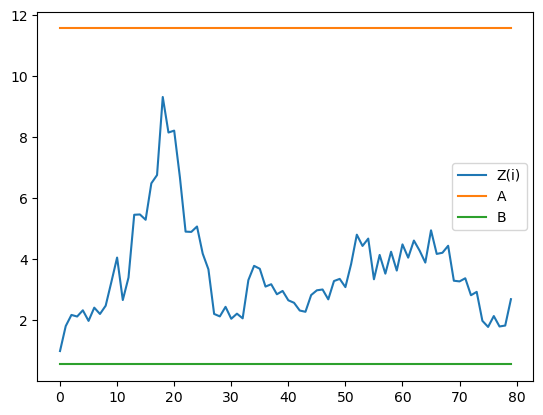

In [10]:
X_k = df.values.flatten()

def Z(j): # определение функции Z(j)
    return np.exp(j * (a_0 ** 2 - a_1 ** 2) / (2 * sigma_1 ** 2) + (a_1 - a_0) / (sigma_1 ** 2) * 
                  sum([X_k[i] for i in range(j)]))

x = np.arange(0, n, 1)
plt.plot(x, [Z(j) for j in x], label='Z(i)')
plt.plot(x, [A for j in x], label='A')
plt.plot(x, [B for j in x], label='B')

plt.legend()
plt.show()

## 	3. Вычислим математическое ожидание момента принятия решения при основной гипотезе $H_0$: a=$-4$ и при альтернативе $H_1$:a=$-4.5$.

In [11]:
M_0 = - (a_1 - a_0) ** 2 / (2 * sigma_1 ** 2)
md(f'''$$M_0 = M_{{\\alpha_0}} ln \\left(\\frac{{p(X_k, \\alpha_1, \\sigma_1)}}{{p(X_k, \\alpha_0, \\sigma_1)}}\\right)
   =   \\frac{{\\alpha_1 - \\alpha_0}}{{2 \\sigma_1^2}} \\left(2M_0X_k - (\\alpha_1 - \\alpha_0) \\right) = 
   \\frac{{\\alpha_1 - \\alpha_0}}{{2 \\sigma_1^2}} \\left(2\\alpha_0 - (\\alpha_1 - \\alpha_0) \\right) =
   - \\frac{{(\\alpha_1 - \\alpha_0)^2}}{{2 \\sigma_1^2}} = - \\frac{{({a_1} - {a_0})^2}}{{2 * {sigma_1}^2}} = 
   {{{round(M_0, 5)}}}$$''')

$$M_0 = M_{\alpha_0} ln \left(\frac{p(X_k, \alpha_1, \sigma_1)}{p(X_k, \alpha_0, \sigma_1)}\right)
   =   \frac{\alpha_1 - \alpha_0}{2 \sigma_1^2} \left(2M_0X_k - (\alpha_1 - \alpha_0) \right) = 
   \frac{\alpha_1 - \alpha_0}{2 \sigma_1^2} \left(2\alpha_0 - (\alpha_1 - \alpha_0) \right) =
   - \frac{(\alpha_1 - \alpha_0)^2}{2 \sigma_1^2} = - \frac{(-4.5 - -4)^2}{2 * 2.7^2} = 
   {-0.01715}$$

In [12]:
M_0nu = alpha * np.log(A) + (1 - alpha) * np.log(B)
M_0nu /= M_0
M_0nu = round(M_0nu, 5)

md(f'''$$M_{{\\alpha_0 \\nu}} = \\frac{{\\alpha ln(A) + (1 - \\alpha) ln(B)}}{{M_0}} =
    \\frac{{{alpha} * ln({A}) + {1 - alpha} * ln({B})}}{{{round(M_0, 5)}}} = {M_0nu}$$''')

$$M_{\alpha_0 \nu} = \frac{\alpha ln(A) + (1 - \alpha) ln(B)}{M_0} =
    \frac{0.04 * ln(11.560500000000001) + 0.96 * ln(0.559979)}{-0.01715} = 26.75477$$

In [13]:
M_1 = (a_1 - a_0) ** 2 / (2 * sigma_1 ** 2)
md(f'''$$M_1 = M_{{\\alpha_1}} ln \\left(\\frac{{p(X_k, \\alpha_1, \\sigma_1)}}{{p(X_k, \\alpha_0, \\sigma_1)}}\\right)
   =   \\frac{{\\alpha_1 - \\alpha_0}}{{2 \\sigma_1^2}} \\left(2M_1X_k - (\\alpha_1 - \\alpha_0) \\right) = 
   \\frac{{\\alpha_1 - \\alpha_0}}{{2 \\sigma_1^2}} \\left(2\\alpha_1 - (\\alpha_1 - \\alpha_0) \\right) =
\\frac{{(\\alpha_1 - \\alpha_0)^2}}{{2 \\sigma_1^2}} = \\frac{{({a_1} - {a_0})^2}}{{2 * {sigma_1}^2}} = 
   {{{round(M_1, 5)}}}$$''')

$$M_1 = M_{\alpha_1} ln \left(\frac{p(X_k, \alpha_1, \sigma_1)}{p(X_k, \alpha_0, \sigma_1)}\right)
   =   \frac{\alpha_1 - \alpha_0}{2 \sigma_1^2} \left(2M_1X_k - (\alpha_1 - \alpha_0) \right) = 
   \frac{\alpha_1 - \alpha_0}{2 \sigma_1^2} \left(2\alpha_1 - (\alpha_1 - \alpha_0) \right) =
\frac{(\alpha_1 - \alpha_0)^2}{2 \sigma_1^2} = \frac{(-4.5 - -4)^2}{2 * 2.7^2} = 
   {0.01715}$$

In [14]:
M_1nu = beta * np.log(B) + (1 - beta) * np.log(A)
M_1nu /= M_1
M_1nu = round(M_1nu, 5)

md(f'''$$M_{{\\alpha_1 \\nu}} = \\frac{{\\beta ln(B) + (1 - \\beta) ln(A)}}{{M_1}} =
    \\frac{{{beta} * ln({B}) + {1 - beta} * ln({A})}}{{{round(M_1, 5)}}} = {M_1nu}$$''')

$$M_{\alpha_1 \nu} = \frac{\beta ln(B) + (1 - \beta) ln(A)}{M_1} =
    \frac{0.53758 * ln(0.559979) + 0.46242000000000005 * ln(11.560500000000001)}{0.01715} = 47.82809$$

## 4. Перепишем критическое множество из пункта 3 в виде $\left( \frac{L(X_1 ... X_n, \alpha_1)}{L(X_1 ... X_n, \alpha_0)} \geq C\right)$

$$S = \left\{ \frac{L(X_1 ... X_n, \alpha_1)}{L(X_1 ... X_n, \alpha_0)} \geq C\right\} = \left\{\prod_{k=1}^{n} exp \left( \frac{\alpha_0^2 - \alpha_1^2}{2\sigma_1^2} + \frac{\alpha_1 - \alpha_0}{\sigma_1^2} \sum_{k=1}^n X_k\right) \geq C\right\} = \left\{ exp \left(n \frac{\alpha_0^2 - \alpha_1^2}{2\sigma_1^2} + \frac{\alpha_1 - \alpha_0}{\sigma_1^2} \sum_{k=1}^n X_k\right) \geq C\right\}$$

$$S = \left\{\frac{\alpha_0^2 - \alpha_1^2}{2\sigma_1^2} + \frac{\alpha_1 - \alpha_0}{\sigma_1^2} \sum_{k=1}^n X_k \geq ln(C) \right\} = \left\{\frac{\sum_{k=1}^n X_k}{n} \geq \frac{\sigma_1^2 \left(\frac{ln(C)}{n} - \frac{\alpha_0^2-\alpha_1^2}{2\sigma_1^2}\right)}{\alpha_1 - \alpha_0} \right\}$$

In [15]:
r = '> 0' if a_1 - a_0 > 0 else '< 0'
md(f'$\\alpha_1 - \\alpha_0 = {a_1} - {a_0} = {a_1 - a_0} {r} =>$ меняем знак')

$\alpha_1 - \alpha_0 = -4.5 - -4 = -0.5 < 0 =>$ меняем знак

In [29]:
md(f'''$\\frac{{\\sum_{{k=1}}^n X_k}}{{n}} <= \\frac{{\\sigma_1^2 \\left(\\frac{{ln(C)}}{{n}} - 
   \\frac{{\\alpha_0^2-\\alpha_1^2}}{{2\\sigma_1^2}}\\right)}}{{\\alpha_1 - \\alpha_0}} = C_5$''')

$\frac{\sum_{k=1}^n X_k}{n} <= \frac{\sigma_1^2 \left(\frac{ln(C)}{n} - 
   \frac{\alpha_0^2-\alpha_1^2}{2\sigma_1^2}\right)}{\alpha_1 - \alpha_0} = C_5$

#### Значение $C_5$ было получено из предыдущей задачи

In [43]:
C = np.exp(abs((4.5285 * (a_1 - a_0) / sigma_1 ** 2 - (a_0 ** 2 - a_1 ** 2) / (2 * sigma_1 ** 2)) * n))


In [44]:
C

4.6095060939906745

#### Таким образом, получаем критическое множество:

$$S = \left\{ \frac{L(X_1 ... X_n, \alpha_1)}{L(X_1 ... X_n, \alpha_0)} \geq 4.6095\right\}$$

#### Приведем графическую иллюстрацию последовательного критерия:

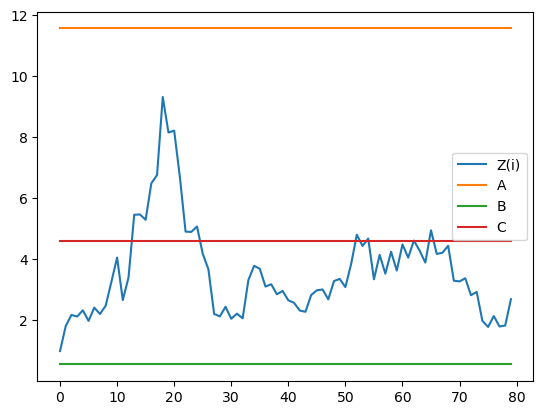

In [45]:
X_k = df.values.flatten()

def Z(j): # определение функции Z(j)
    return np.exp(j * (a_0 ** 2 - a_1 ** 2) / (2 * sigma_1 ** 2) + (a_1 - a_0) / (sigma_1 ** 2) 
                  * sum([X_k[i] for i in range(j)]))

x = np.arange(0, n, 1)
plt.plot(x, [Z(j) for j in x], label='Z(i)')
plt.plot(x, [A for j in x], label='A')
plt.plot(x, [B for j in x], label='B')
plt.plot(x, [C for j in x], label='C')

plt.legend()
plt.show()

#### При этом при n = 80:

In [47]:
md(f'$\\frac{{L(X_1 ... X_n, \\alpha_1)}}{{L(X_1 ... X_n, \\alpha_0)}} = {Z(80)} < {C}$')

$\frac{L(X_1 ... X_n, \alpha_1)}{L(X_1 ... X_n, \alpha_0)} = 2.649622056404534 < 4.6095060939906745$

#### Из этого делаем вывод, что принимаем гипотезу $H_0$

## 5. Выводы

При критерии Неймана-Пирсона выбирается гипотеза H0, что соответствует 3 пункту 5-го домашнего задания. Критерий Вальда не дает точного ответа на вопрос какую гипотезу принимать , недостаточен объем выборки.